<a href="https://colab.research.google.com/github/Msender98/Masters-Work/blob/master/amath585-hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMATH 585 - HW 4
## Michael Sender

Please note that this notebook was written in [google colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) . 

In [0]:
#Google-colab only : skip this cell if working locally
#https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA reference for connecting colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from pylab import *
%matplotlib inline
%cd /content/drive/My Drive/UW_stuff/AMATH585/my585/hw4/
from chebyshevspectral import T, T_sum, poly_interp_chebyshev, poly_plot_chebyshev


/content/drive/My Drive/UW_stuff/AMATH585/my585/hw4


***
##Problem 1
###a)
First I packaged calculating the error in a chebyshev polynomial interpolation for a given function and an array, N, of different numbers of points into a python function: cheberr, defined below. The output is an array of max norm errors of the same function with different numbers of points used in the chebyshev polynomial interpolation.

In [0]:
def cheberr(u,N):
  xfine = linspace(-1,1,1000)
  ufine = u(xfine)
  err = zeros(len(N))
  for n in range(len(N)):

    x = cos(linspace(0, pi,N[n]+1))
    c = poly_interp_chebyshev(u, x)

    p = T_sum(c, xfine)

    E = ufine - p

    err[n] = max(E)
  return err

In [0]:
N = linspace(0,200,40)
u_fcn = lambda x: 1 / (1 + 16*x**2)
err = cheberr(u_fcn,N)

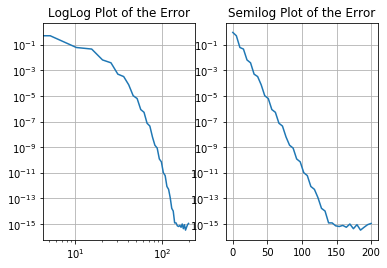

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.loglog(N,err)
ax1.set_title('LogLog Plot of the Error')
ax1.grid(True)
ax2.semilogy(N,err)
title('Semilog Plot of the Error')
grid(True)

These plots match those in the hw assignment, showing exponential convergence of the solution with increasing N. The bottom horizontal line is from the accuracy of the computer. 

###b)
Next we use the same cheberr function with the second Runge function.

In [0]:
u_fcn2 = lambda x: 1 / (1 + 25*x**2)
err = cheberr(u_fcn2,N)

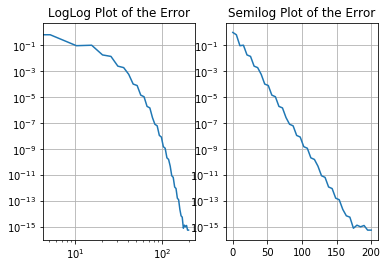

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.loglog(N,err)
ax1.set_title('LogLog Plot of the Error')
ax1.grid(True)
ax2.semilogy(N,err)
title('Semilog Plot of the Error')
grid(True)

As expected the error is still exponentially converging but less quickly than the previous Runge function. 

###c)

In [0]:
u_fcn3 = lambda x:(x-0.5)*sin(10*x)
N = linspace(5,50,10)

In [0]:
err= cheberr(u_fcn3, N)

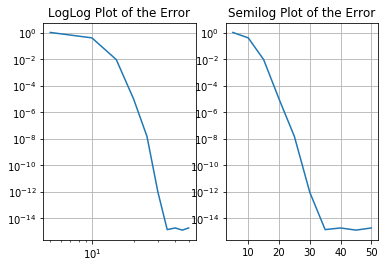

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.loglog(N,err)
ax1.set_title('LogLog Plot of the Error')
ax1.grid(True)
ax2.semilogy(N,err)
title('Semilog Plot of the Error')
grid(True)

The final function converges even faster, with an exponential curve in the semilog plot. Notice the use of smaller N than the previous example.

##Problem 2

I defined a function Txx which evaluates the second derivative of a chebyshev polynomial at a given set of points. It uses a 3-point recurrence relation, with:  
$T_{xx}(n+1) = 4T_x(n)+2xT_{xx}(n)-T_{xx}(n-1)$  
$T_{xx}(0) = 0$  ,  $T_{xx}(1) = 0$

In [0]:
def Txx(n,x):
    """
    Evaluate the second derivative of Chebyshev polynomial T_n(x) using 3-term recurrence relation
    Assumes x is a numpy array of points.
    """
    Tnm = ones(x.shape)  # will be used for T_{n-1} in loop
    Txnm = zeros(x.shape)
    Txxnm = zeros(x.shape)
    if n==0:
        return Txxnm       # special case T_0 = 1 forall x
    Tn = x               # will be used for T_n in loop
    Txn = ones(x.shape)
    Txxn = zeros(x.shape)
    
    for k in range(2,n+1):
        Tnp = 2*x*Tn - Tnm
        Txnp = 2*Tn + 2*x*Txn - Txnm
        Txxnp = 4*Txn +2*x*Txxn - Txxnm
        Tnm = Tn.copy()
        Tn = Tnp.copy()
        Txnm = Txn.copy()
        Txn = Txnp.copy()
        Txxnm = Txxn.copy()
        Txxn = Txxnp.copy()
    return Txxn

The next function takes the second derivative of an input function, using the above Txx chebyshev polynomials and the coefficents of a polynomial interpolation of the given function. 

In [0]:
def Uxx(u,N,xfine):
  x = cos(linspace(0, pi, N+1))
  c = poly_interp_chebyshev(u, x)

  B = empty((len(xfine),N+1))

  # evaluate sum c_n * Txx_n(x) at xfine points:

  for k in range(N+1):
      B[:,k] = Txx(k,xfine)
  pfine = dot(B,c)
  return pfine




In [0]:
u_fcn = lambda x: sin(2*x)
ux_fcn = lambda x: 2*cos(2*x)
uxx_fcn = lambda x:-4*sin(2*x)
xfine = linspace(-1,1,1000)

N = 8
x = cos(linspace(0, pi, N+1))

Max absolute error in derivative = 0.00664789


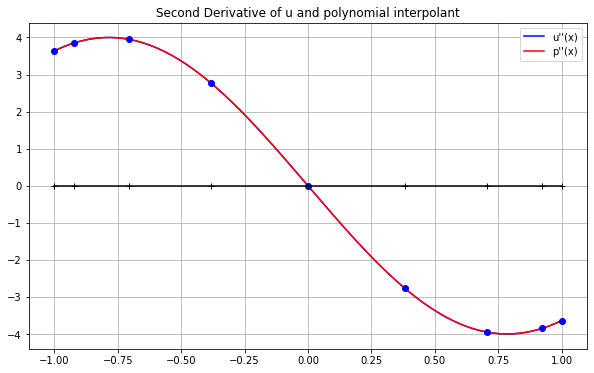

In [0]:
pfine = Uxx(u_fcn,N,xfine)

uxx_fine = uxx_fcn(xfine)

figure(figsize=(10,6))
plot(xfine, uxx_fine, 'b', label="u''(x)")
plot(xfine, pfine, 'r', label="p''(x)")
plot(x, uxx_fcn(x), 'bo')
plot(x, zeros(x.shape), 'k-+')
grid(True)
legend()
title('Second Derivative of u and polynomial interpolant')
print('Max absolute error in derivative = %g' % abs(pfine-uxx_fine).max());

This is the result of the Uxx function tested on $U(x) = sin(2x)$
It seems to approximate the true second derivative well! 

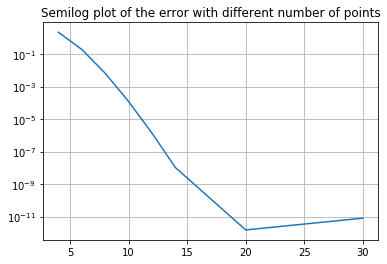

In [0]:
N = [4,5,6,7,8,10,12,14,20,30]
uxx_fine = uxx_fcn(xfine)
E = zeros(len(N))
for n in range(len(N)):
  x = cos(linspace(0, pi, N[n]+1))
  p = Uxx(u_fcn,N[n],xfine)
  E[n] = abs(p-uxx_fine).max()

semilogy(N,E)
title('Semilog plot of the error with different number of points')
grid(True)

The error converges exponentially and is moderately succesful with relatively few points. 

In [0]:
u_fcn = lambda x: (x-0.5)*sin(10*x)
uxx_fcn = lambda x: 20*(cos(10*x) - 5*(-0.5 + x)*sin(10*x))
xfine = linspace(-1,1,1000)

N = 20
x = cos(linspace(0, pi, N+1))

Max absolute error in derivative = 0.158218


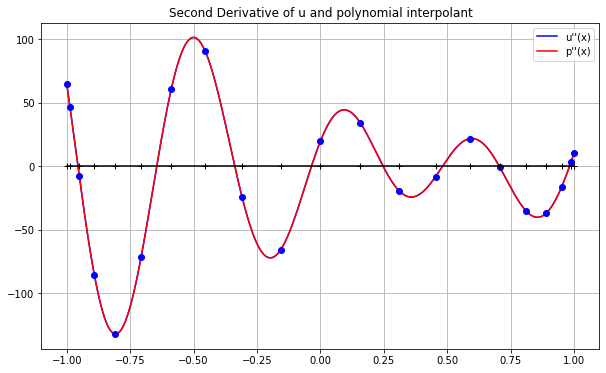

In [0]:
pfine = Uxx(u_fcn,N,xfine)

uxx_fine = uxx_fcn(xfine)

figure(figsize=(10,6))
plot(xfine, uxx_fine, 'b', label="u''(x)")
plot(xfine, pfine, 'r', label="p''(x)")
plot(x, uxx_fcn(x), 'bo')
plot(x, zeros(x.shape), 'k-+')
grid(True)
legend()
title('Second Derivative of u and polynomial interpolant')
print('Max absolute error in derivative = %g' % abs(pfine-uxx_fine).max());

This is the result of the Uxx function run on $(x-0.5)sin(10x)$
I used more points for this plot because (as shown in the next plot) there are large innacuracies with less points. 

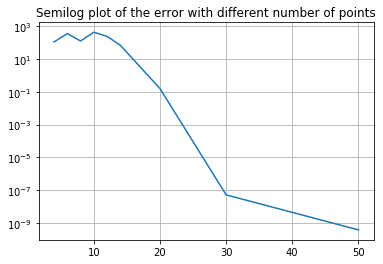

In [0]:
N = [4,6,8,10,12,14,20,30,50]
uxx_fine = uxx_fcn(xfine)
E = zeros(len(N))
for n in range(len(N)):
  x = cos(linspace(0, pi, N[n]+1))
  p = Uxx(u_fcn,N[n],xfine)
  E[n] = abs(p-uxx_fine).max()

semilogy(N,E)
title('Semilog plot of the error with different number of points')
grid(True)

The error at first is quite high ,~$10^2$, with as many as 10 points.  This is because of the many oscillations of the function in this domain. A higher order polynomial is needed to have that many oscillations. 

An example with 8 points is shown below to show this. 

In [0]:
u_fcn = lambda x: (x-0.5)*sin(10*x)
uxx_fcn = lambda x: 20*(cos(10*x) - 5*(-0.5 + x)*sin(10*x))
xfine = linspace(-1,1,1000)

N = 8
x = cos(linspace(0, pi, N+1))

Max absolute error in derivative = 126.399


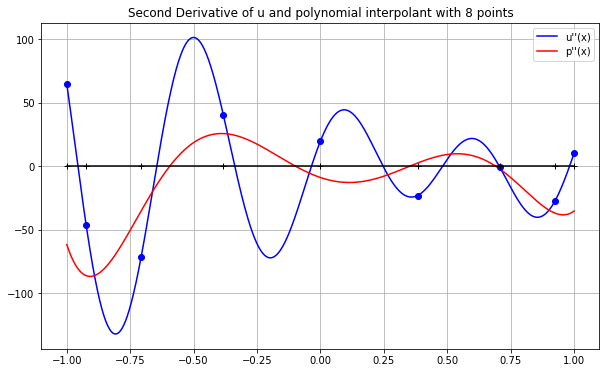

In [0]:
pfine = Uxx(u_fcn,N,xfine)

uxx_fine = uxx_fcn(xfine)

figure(figsize=(10,6))
plot(xfine, uxx_fine, 'b', label="u''(x)")
plot(xfine, pfine, 'r', label="p''(x)")
plot(x, uxx_fcn(x), 'bo')
plot(x, zeros(x.shape), 'k-+')
grid(True)
legend()
title('Second Derivative of u and polynomial interpolant with 8 points')
print('Max absolute error in derivative = %g' % abs(pfine-uxx_fine).max());

In [0]:
u_fcn = lambda x: 1/(1+16*x**2)
uxx_fcn = lambda x: (32*(-1 + 48*x**2))/(1 + 16*x**2)**3
xfine = linspace(-1,1,1000)

N = 20
x = cos(linspace(0, pi, N+1))

Max absolute error in derivative = 34.3339


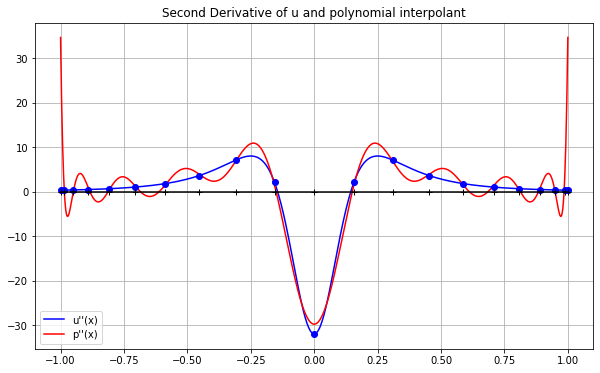

In [0]:
pfine = Uxx(u_fcn,N,xfine)

uxx_fine = uxx_fcn(xfine)

figure(figsize=(10,6))
plot(xfine, uxx_fine, 'b', label="u''(x)")
plot(xfine, pfine, 'r', label="p''(x)")
plot(x, uxx_fcn(x), 'bo')
plot(x, zeros(x.shape), 'k-+')
grid(True)
legend()
title('Second Derivative of u and polynomial interpolant')
print('Max absolute error in derivative = %g' % abs(pfine-uxx_fine).max());

This is the same function used to calculate the second derivative of the Runge function. Because of the poles in the runge function (in the complex plane) these polynomials are not well suited to approximating it and have large deviations. At a much higher number of points than previous it is still possible to get a good approximation. And indeed it looks like exponential convergence but much slower. 

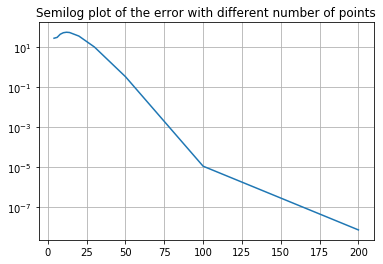

In [0]:
N = [4,6,8,10,12,14,20,30,50,100,200]
uxx_fine = uxx_fcn(xfine)
E = zeros(len(N))
for n in range(len(N)):
  x = cos(linspace(0, pi, N[n]+1))
  p = Uxx(u_fcn,N[n],xfine)
  E[n] = abs(p-uxx_fine).max()

semilogy(N,E)
title('Semilog plot of the error with different number of points')
grid(True)

As discussed above the solutions converge much slower than previous examples. With enough points it is possible to get a good approximation.

In [0]:
u_fcn = lambda x: 1/(1+16*x**2)
uxx_fcn = lambda x: (32*(-1 + 48*x**2))/(1 + 16*x**2)**3
xfine = linspace(-1,1,1000)

N = 200
x = cos(linspace(0, pi, N+1))

Max absolute error in derivative = 7.15236e-09


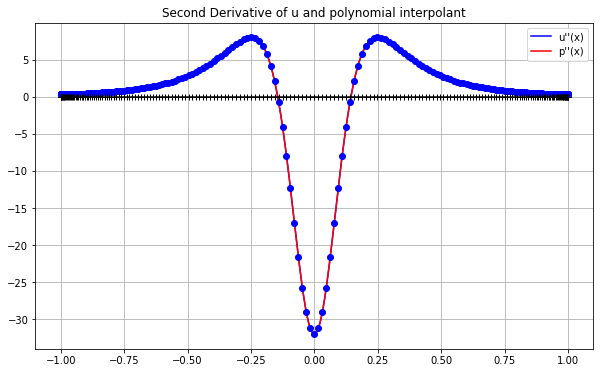

In [0]:
pfine = Uxx(u_fcn,N,xfine)

uxx_fine = uxx_fcn(xfine)

figure(figsize=(10,6))
plot(xfine, uxx_fine, 'b', label="u''(x)")
plot(xfine, pfine, 'r', label="p''(x)")
plot(x, uxx_fcn(x), 'bo')
plot(x, zeros(x.shape), 'k-+')
grid(True)
legend()
title('Second Derivative of u and polynomial interpolant')
print('Max absolute error in derivative = %g' % abs(pfine-uxx_fine).max());

##Problem 3
#a)

Below is a python function, chebspec, which calculates the coefficents of the chebyshev polyonomials (and second derivative of the chebyshev polynomials at interior points).  Those coefficents can simply be multiplied by the chebyshev polynomials to give an approximation to the solution of a ODE of the form: $U_{xx}=f(x)$

In [0]:
def chebspec(uxx_fcn,N,alpha,beta):
    x = cos(linspace(0, pi, N+1))
    B = empty((len(x),N+1))

    for k in range(N+1):
        B[:,k] = Txx(k,x)
        B[0,k] = T(k,array(1))
        B[N,k] = T(k,array(-1))

    f = uxx_fcn(x)

    f[0] = beta; f[N] = alpha

    c = solve(B,f)
    return c

In [0]:
uxx_fcn = lambda x:-4*sin(2*x)
u_fcn = lambda x: sin(2*x)
N = 8
x = cos(linspace(0, pi, N+1))


beta = u_fcn(1)
alpha = u_fcn(-1)


In [0]:
c = chebspec(uxx_fcn,N,alpha,beta)

D = empty((len(xfine),N+1))
for k in range(N+1):
    D[:,k] = T(k,xfine)

p = dot(D,c)



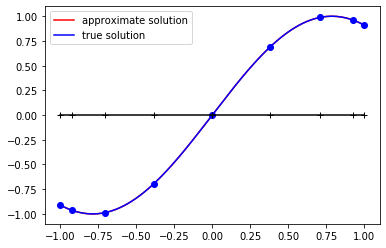

In [0]:
plot(xfine, p, 'r', label="approximate solution")
plot(xfine, u_fcn(xfine), 'b', label = 'true solution')
plot(x, u_fcn(x), 'bo')
plot(x, zeros(x.shape), 'k-+')
legend()

This is the result, plotting the approximation in red and the true solution in blue. There is very little error with only 8 points!

Text(0.5, 1.0, 'Semilog plot of the error of chebspec with increasing points')

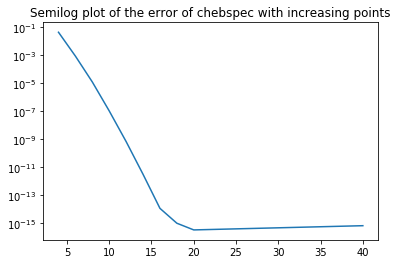

In [0]:
N = [4,6,8,10,12,14,16,18,20,40]
E = zeros(len(N))
for n in range(len(N)):
  c = chebspec(uxx_fcn,N[n],alpha,beta)

  D = empty((len(xfine),N[n]+1))
  for k in range(N[n]+1):
      D[:,k] = T(k,xfine)

  p = dot(D,c)
  E[n] = abs(p-u_fcn(xfine)).max()

semilogy(N,E)
title('Semilog plot of the error of chebspec with increasing points')

The error converges exponentially! 